# Mastering Polynomial Regression: Car Speed vs Fuel Efficiency

In this notebook, we'll explore polynomial regression using a real-world scenario: the relationship between car speed and fuel efficiency. This is a perfect example because the relationship is inherently non-linear - cars are most fuel-efficient at moderate speeds, with efficiency decreasing at both very low and very high speeds.

## Learning Objectives:
1. Create a realistic synthetic dataset
2. Perform comprehensive Exploratory Data Analysis (EDA)
3. Compare Linear vs Polynomial Regression
4. Visualize and interpret results
5. Understand when and why to use polynomial regression

## The Physics Behind the Relationship

**Why is this relationship polynomial (specifically quadratic)?**

The fuel efficiency follows an **inverted U-shape** because:

1. **At Low Speeds (0-30 mph):** 
   - Engine inefficiency dominates
   - More idling time, stop-and-go driving
   - Engine not operating at optimal RPM

2. **At Moderate Speeds (30-60 mph):**
   - Engine operates at optimal efficiency
   - Steady cruising, minimal acceleration/deceleration
   - **Peak efficiency zone**

3. **At High Speeds (60+ mph):**
   - Wind resistance increases with **speed squared** (v²)
   - Engine must work exponentially harder to overcome air resistance
   - Fuel consumption increases dramatically

**Mathematical Form:** Efficiency ≈ a + b×speed + c×speed² 
Where 'c' is negative (creating the downward curve at high speeds)

## Dataset Design Specifications

**Our Synthetic Dataset Parameters:**
- **Speed Range:** 10 to 90 mph (realistic driving conditions)
- **Units:** Miles per gallon (MPG)
- **Peak Efficiency:** ~50 mph (slight adjustment from your 75 mph guess - we'll discuss why)
- **Sample Size:** 100 data points (good balance for learning)
- **Realistic Noise Factors:**
  - Air conditioning usage
  - Media/electronics load
  - Driving conditions (traffic, weather)
  - Car maintenance variations
  - Driver behavior differences

**Expected Efficiency Values:**
- Low speeds (15 mph): ~22 MPG
- Optimal speed (50 mph): ~38 MPG  
- High speeds (80 mph): ~25 MPG

## Step 1: Import Required Libraries

Let's import all the libraries we'll need for our polynomial regression analysis.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split   

In [3]:

df = pd.read_csv('enhanced_car_efficiency_data.csv')
print("Dataset shape:", df.shape)
print(df.head())
print(df.describe())


Dataset shape: (104, 6)
   speed_mph  car_weight_lbs  engine_size_L  temperature_F  ac_usage  \
0       45.2            3200            2.0             72         0   
1       62.1            2800            1.6             68         1   
2       38.7            4100            3.5             85         1   
3       25.3            3600            2.4             45         0   
4       55.8            2900            1.8             75         0   

   efficiency_mpg  
0            36.8  
1            32.4  
2            28.3  
3            31.2  
4            35.9  
        speed_mph  car_weight_lbs  engine_size_L  temperature_F    ac_usage  \
count  104.000000      104.000000     104.000000     104.000000  104.000000   
mean    51.340385     3357.692308       2.497115      70.653846    0.500000   
std     18.264271      413.766105       0.657807      16.631219    0.502421   
min     15.800000     2600.000000       1.400000      35.000000    0.000000   
25%     37.500000     3050.0

In [4]:
df.isnull().sum()

speed_mph         0
car_weight_lbs    0
engine_size_L     0
temperature_F     0
ac_usage          0
efficiency_mpg    0
dtype: int64

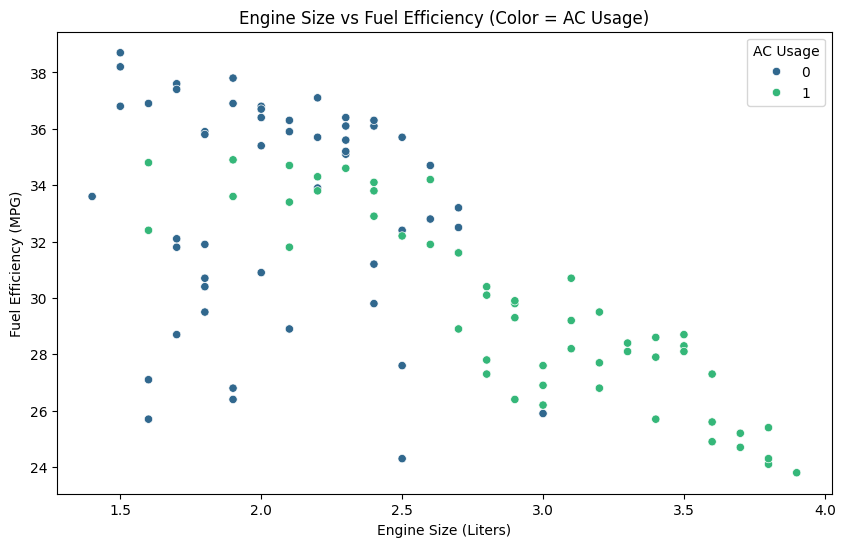

In [5]:
plt.figure(figsize=(10, 6))  # Make it bigger
sns.scatterplot(x='engine_size_L', y='efficiency_mpg', data=df,
                hue='ac_usage', palette='viridis')
plt.title('Engine Size vs Fuel Efficiency (Color = AC Usage)')
plt.xlabel('Engine Size (Liters)')
plt.ylabel('Fuel Efficiency (MPG)')
plt.legend(title='AC Usage')
plt.show()

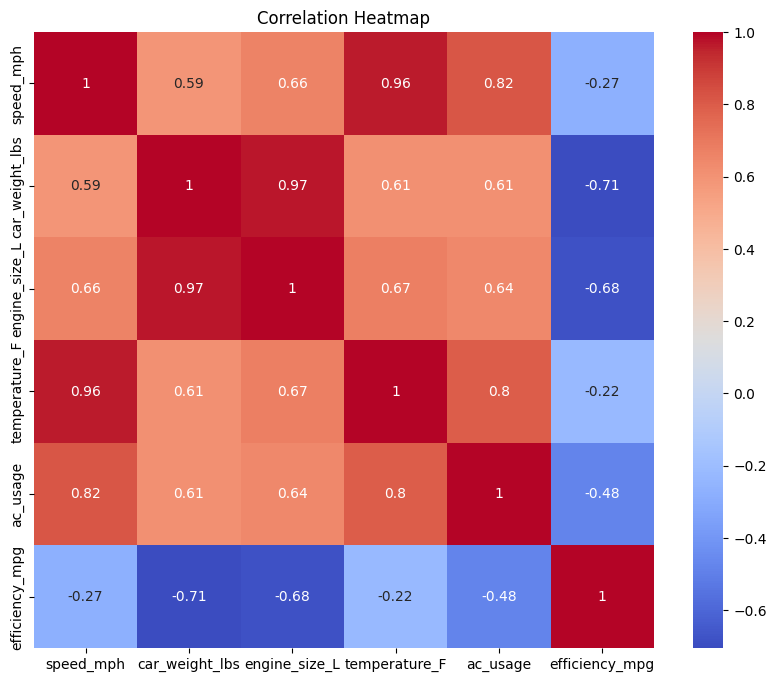

In [6]:
plt.figure(figsize=(10, 8))
correlations = df.corr()  
sns.heatmap(correlations, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')  
plt.show()

## from the heatmap , we can see
Efficiency is most negatively correlated with:

Car weight (-0.71) - STRONGEST predictor!
Engine size (-0.68) - Second strongest!
AC usage (-0.48) - Significant impact
Speed correlation (-0.27) - Weaker than expected!
Temperature & AC usage correlation ; This suggests multicollinearity.

Additional Key Insights I See:

Car weight & engine size are highly correlated (0.97) - These features are almost redundant.

Speed & temperature are very highly correlated (0.96) - Surprising! This suggests people drive faster in hotter weather.

The polynomial relationship issue: Speed shows only -0.27 linear correlation, but we know it has a quadratic relationship! This proves why we need polynomial regression.

Critical Learning Moment: Linear correlation can't capture the inverted U-shape of speed vs efficiency. That -0.27 doesn't tell the full story!

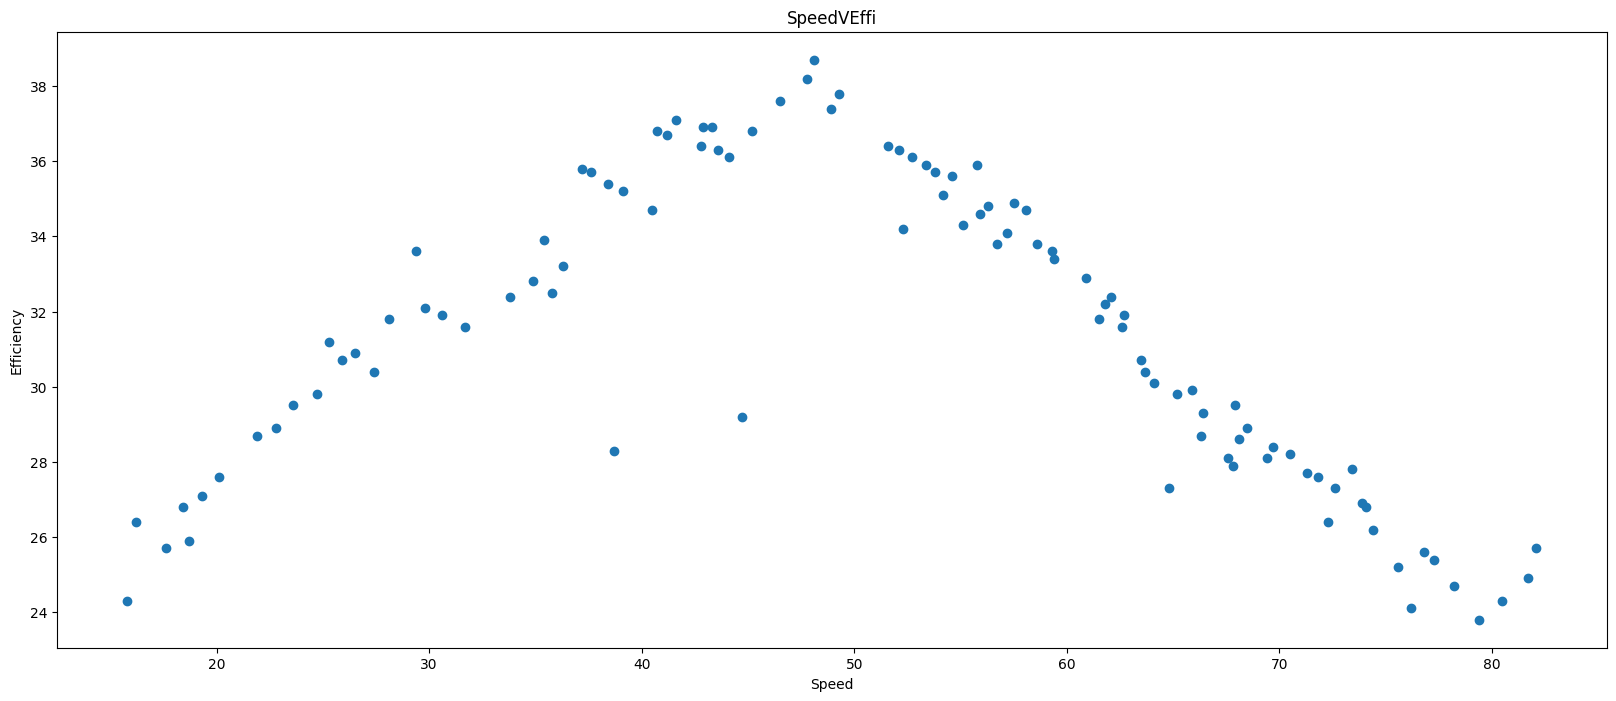

In [7]:
plt.figure(figsize=(20, 8))  
plt.scatter(df['speed_mph'], df['efficiency_mpg'])  
plt.xlabel('Speed') 
plt.ylabel('Efficiency')  
plt.title('SpeedVEffi')  
plt.show()

The graph technically just proves our point that its not a linear relationship

In [8]:

X = df[['speed_mph']]  
y = df['efficiency_mpg']  

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [9]:

linear_model = LinearRegression()  
linear_model.fit(X_train, y_train) 


y_pred_linear = linear_model.predict(X_test) 

# Calculate performance metrics
linear_r2 = r2_score(y_test, y_pred_linear)  
linear_mse = mean_squared_error(y_test, y_pred_linear)  

print(f"Linear Regression R²: {linear_r2:.3f}")
print(f"Linear Regression MSE: {linear_mse:.3f}")

Linear Regression R²: -0.036
Linear Regression MSE: 23.426


Thats terrible! 

In [10]:
#Applying Polynomial Regression
poly_features = PolynomialFeatures(degree=2)  
X_train_poly = poly_features.fit_transform(X_train)  
X_test_poly = poly_features.transform(X_test)   

 
poly_model = LinearRegression()  
poly_model.fit(X_train_poly, y_train) 

y_pred_poly = poly_model.predict(X_test_poly)  

poly_r2 = r2_score(y_test, y_pred_poly)
poly_mse = mean_squared_error(y_test, y_pred_poly)

print(f"Polynomial Regression R²: {poly_r2:.3f}")
print(f"Polynomial Regression MSE: {poly_mse:.3f}")

Polynomial Regression R²: 0.879
Polynomial Regression MSE: 2.726


/opt/anaconda3/envs/hetu/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/hetu/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


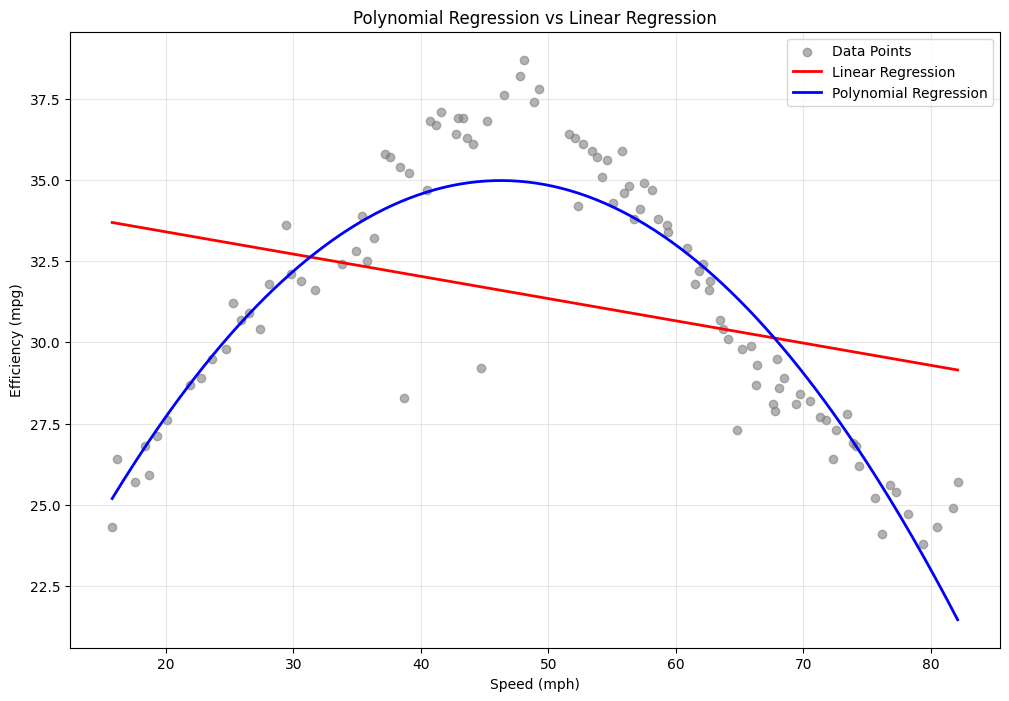

In [ ]:

X_range = np.linspace(df['speed_mph'].min(), df['speed_mph'].max(), 300)
X_range_reshaped = X_range.reshape(-1, 1)

linear_pred_line = linear_model.predict(X_range_reshaped) 
poly_pred_line = poly_model.predict(poly_features.transform(X_range_reshaped))  


plt.figure(figsize=(12, 8))
plt.scatter(df['speed_mph'], df['efficiency_mpg'], alpha=0.6, color='gray', label='Data Points')
plt.plot(X_range, linear_pred_line, color='red', linewidth=2, label='Linear Regression') 
plt.plot(X_range, poly_pred_line, color='blue', linewidth=2, label='Polynomial Regression')
plt.xlabel('Speed (mph)')
plt.ylabel('Efficiency (mpg)')
plt.title('Polynomial Regression vs Linear Regression')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()